In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd
df = pd.read_csv('../input/housing/housepricedata.csv')


In [4]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [5]:
dataset = df.values
dataset


array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [7]:
X = dataset[:,0:10]
Y = dataset[:,10]


In [8]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [9]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)


In [15]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [16]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 19ms/step - loss: 0.7205 - accuracy: 0.5186 - val_loss: 0.7190 - val_accuracy: 0.4703
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7119 - accuracy: 0.4898 - val_loss: 0.7097 - val_accuracy: 0.4612
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7031 - accuracy: 0.5144 - val_loss: 0.7036 - val_accuracy: 0.4292
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7019 - accuracy: 0.4815 - val_loss: 0.6991 - val_accuracy: 0.4703
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6966 - accuracy: 0.5120 - val_loss: 0.6951 - val_accuracy: 0.5023
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5870 - val_loss: 0.6911 - val_accuracy: 0.5662
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6887 - accuracy: 0.6177 - val_loss: 0.6869 - val_accuracy: 0.6164
Epoch 8/100


Epoch 59/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3307 - accuracy: 0.8912 - val_loss: 0.3757 - val_accuracy: 0.8539
Epoch 60/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3518 - accuracy: 0.8633 - val_loss: 0.3736 - val_accuracy: 0.8539
Epoch 61/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3241 - accuracy: 0.8909 - val_loss: 0.3713 - val_accuracy: 0.8493
Epoch 62/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3295 - accuracy: 0.8738 - val_loss: 0.3695 - val_accuracy: 0.8539
Epoch 63/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3184 - accuracy: 0.8782 - val_loss: 0.3681 - val_accuracy: 0.8539
Epoch 64/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3474 - accuracy: 0.8675 - val_loss: 0.3662 - val_accuracy: 0.8539
Epoch 65/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3253 - accuracy: 0.8808 - val_loss: 0.3646 - val_accuracy: 0.8539
Epoch 

In [17]:
model.evaluate(X_test, Y_test)[1]


7/7 [==============================] - 0s 1ms/step - loss: 0.2553 - accuracy: 0.8904


0.8904109597206116

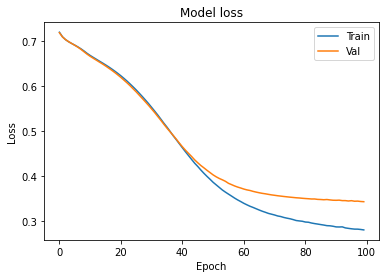

In [18]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [22]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [24]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 33ms/step - loss: 0.5425 - accuracy: 0.6929 - val_loss: 0.4073 - val_accuracy: 0.8265
Epoch 2/100
32/32 [==============================] - 1s 27ms/step - loss: 0.3464 - accuracy: 0.8609 - val_loss: 0.3432 - val_accuracy: 0.8493
Epoch 3/100
32/32 [==============================] - 1s 31ms/step - loss: 0.2880 - accuracy: 0.8735 - val_loss: 0.3757 - val_accuracy: 0.8493
Epoch 4/100
32/32 [==============================] - 1s 31ms/step - loss: 0.2676 - accuracy: 0.8939 - val_loss: 0.3550 - val_accuracy: 0.8311
Epoch 5/100
32/32 [==============================] - 1s 30ms/step - loss: 0.2513 - accuracy: 0.8964 - val_loss: 0.3404 - val_accuracy: 0.8356
Epoch 6/100
32/32 [==============================] - 1s 33ms/step - loss: 0.2715 - accuracy: 0.8955 - val_loss: 0.3222 - val_accuracy: 0.8539
Epoch 7/100
32/32 [==============================] - 1s 32ms/step - loss: 0.2661 - accuracy: 0.8905 - val_loss: 0.4025 - val_accuracy: 0.8630
Epoch 

32/32 [==============================] - 1s 27ms/step - loss: 0.1362 - accuracy: 0.9434 - val_loss: 0.5878 - val_accuracy: 0.8676
Epoch 59/100
32/32 [==============================] - 1s 26ms/step - loss: 0.1188 - accuracy: 0.9445 - val_loss: 0.4359 - val_accuracy: 0.8493
Epoch 60/100
32/32 [==============================] - 1s 27ms/step - loss: 0.1405 - accuracy: 0.9351 - val_loss: 0.5006 - val_accuracy: 0.8904
Epoch 61/100
32/32 [==============================] - 1s 27ms/step - loss: 0.1422 - accuracy: 0.9438 - val_loss: 0.5266 - val_accuracy: 0.8630
Epoch 62/100
32/32 [==============================] - 1s 26ms/step - loss: 0.1349 - accuracy: 0.9374 - val_loss: 0.4843 - val_accuracy: 0.8721
Epoch 63/100
32/32 [==============================] - 1s 28ms/step - loss: 0.1372 - accuracy: 0.9393 - val_loss: 0.7285 - val_accuracy: 0.8813
Epoch 64/100
32/32 [==============================] - 1s 27ms/step - loss: 0.1427 - accuracy: 0.9382 - val_loss: 0.5752 - val_accuracy: 0.8356
Epoch 65/100

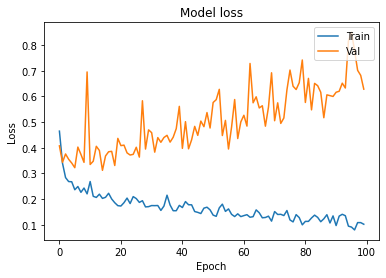

In [25]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [31]:
from keras.layers import Dropout
from keras import regularizers

model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [32]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 39ms/step - loss: 21.1396 - accuracy: 0.5342 - val_loss: 3.9055 - val_accuracy: 0.8402
Epoch 2/100
32/32 [==============================] - 1s 33ms/step - loss: 2.5103 - accuracy: 0.8017 - val_loss: 0.6905 - val_accuracy: 0.8447
Epoch 3/100
32/32 [==============================] - 1s 33ms/step - loss: 0.5935 - accuracy: 0.8656 - val_loss: 0.5589 - val_accuracy: 0.8447
Epoch 4/100
32/32 [==============================] - 1s 32ms/step - loss: 0.5161 - accuracy: 0.8759 - val_loss: 0.5169 - val_accuracy: 0.8584
Epoch 5/100
32/32 [==============================] - 1s 37ms/step - loss: 0.4956 - accuracy: 0.8726 - val_loss: 0.5043 - val_accuracy: 0.8584
Epoch 6/100
32/32 [==============================] - 1s 36ms/step - loss: 0.4946 - accuracy: 0.8633 - val_loss: 0.5187 - val_accuracy: 0.8584
Epoch 7/100
32/32 [==============================] - 1s 32ms/step - loss: 0.4603 - accuracy: 0.8779 - val_loss: 0.5086 - val_accuracy: 0.8493
Epoch

32/32 [==============================] - 1s 35ms/step - loss: 0.4142 - accuracy: 0.8910 - val_loss: 0.4661 - val_accuracy: 0.8584
Epoch 59/100
32/32 [==============================] - 1s 33ms/step - loss: 0.4591 - accuracy: 0.8793 - val_loss: 0.4769 - val_accuracy: 0.8402
Epoch 60/100
32/32 [==============================] - 1s 35ms/step - loss: 0.4251 - accuracy: 0.8829 - val_loss: 0.5334 - val_accuracy: 0.8447
Epoch 61/100
32/32 [==============================] - 1s 33ms/step - loss: 0.4528 - accuracy: 0.8621 - val_loss: 0.4790 - val_accuracy: 0.8447
Epoch 62/100
32/32 [==============================] - 1s 34ms/step - loss: 0.4530 - accuracy: 0.8736 - val_loss: 0.4714 - val_accuracy: 0.8721
Epoch 63/100
32/32 [==============================] - 1s 34ms/step - loss: 0.4199 - accuracy: 0.9014 - val_loss: 0.4774 - val_accuracy: 0.8447
Epoch 64/100
32/32 [==============================] - 1s 34ms/step - loss: 0.4353 - accuracy: 0.8806 - val_loss: 0.4743 - val_accuracy: 0.8676
Epoch 65/100

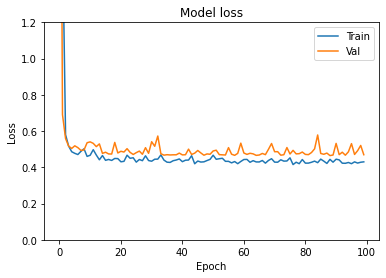

In [33]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

KeyError: 'val_acc'

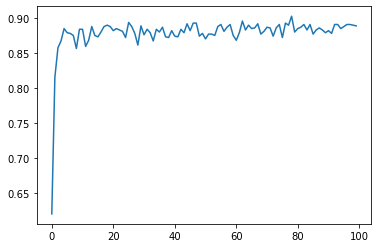